## 9.2.1 文本序列数据

上一节我们学习了序列数据的概念，并用一个时间序列模型演示了序列建模方法。与时间序列数据不同，文本序列数据是一类有序的文本数据，每个数据项都是一个字符串，并且这些字符串是有序的。文本序列数据常常被用来表示自然语言文本，例如句子或者段落。例如，一段英文文本可以表示为一个文本序列数据，其中每个数据项都是一个单词。

文本序列数据常常被用来做自然语言处理任务，例如文本分类、机器翻译、文本生成等。在这些任务中，常常需要使用深度学习模型来处理文本序列数据，并使用文本序列数据来训练这些模型。

## 9.2.2 文本预处理

文本预处理是指在进行自然语言处理任务之前对文本进行的一系列处理步骤。目的是使文本变得更适合进行自然语言处理任务，并且可以提高处理效率。

文本预处理的步骤通常包括：

1. 去除文本中的噪声，例如标点符号、HTML标签、空格等，或者停用词。停用词是指在文本中出现频率较高，但没有实际意义的词，例如“的”，“了”等。

2. 将字符串拆分为词元（如单词和字符）。

3. 建立词表，将拆分的词元映射到数字索引。

4. 将文本转换为数字索引序列，方便模型操作。

5. 编码文本，例如使用one-hot编码将单词转换成数字向量。

进行文本预处理的目的是使文本更适合进行自然语言处理任务，一方面可以把文本数据转化成计算机能理解的数字和向量，另一方面，可以减少噪声，提高模型的训练效率、提升模型的泛化能力等。

## 9.2.3 数据读取

我们每天都会阅读并亲手创造大量的文本数据，比如看网站的新闻，和朋友互发消息，写工作报告等等，包括你现在看的这篇教程。相对新闻网站和聊天数据，小说是一种更为优质的文本数据。我们以金庸的短篇小说《越女剑》为例，看一下文本预处理的每一步的操作。

首先是数据的读取，方法非常简答。

In [2]:
with open('data/越女剑.txt', 'r') as f:
    lines = f.readlines()
print(len(lines))
print(lines[:10])

191
['越女剑\n', '“请！”“请！”\n', '两名剑士各自倒转剑尖，右手握剑柄，左手搭于右手手背，躬身行礼。\n', '两人身子尚未站直，突然间白光闪动，跟着铮的一声响，双剑相交，两人各退一步。旁观众人都是“咦”的一声轻呼。\n', '青衣剑士连劈三剑，锦衫剑士一一格开。青衣剑士一声吒喝，长剑从左上角直划而下，势劲力急。锦衫剑士身手矫捷，向后跃开，避过了这剑。他左足刚着地，身子跟着弹起，刷刷两剑，向对手攻去。青衣剑士凝里不动，嘴角边微微冷笑，长剑轻摆，挡开来剑。\n', '锦衫剑士突然发足疾奔，绕着青衣剑士的溜溜的转动，脚下越来越快。青衣剑士凝视敌手长剑剑尖，敌剑一动，便挥剑击落。锦衫剑士忽而左转，忽而右转，身法变幻不定。青衣剑士给他转得微感晕眩，喝道：“你是比剑，还是逃命？”刷刷两剑，直削过去。但锦衫剑士奔转甚急，剑到之时，人已离开，敌剑剑锋总是和他身子差了尺许。\n', '青衣剑士回剑侧身，右退微蹲，锦衫剑士看出破绽，挺剑向他左肩疾刺。不料青衣剑士这一蹲乃是诱招，长剑突然圈转，直取敌人咽喉，势道劲急无轮。锦衫剑士大骇之下，长剑脱手，向敌人心窝激射过去。这是无可奈何同归于尽的打法，敌人若是继续进击，心窝必定中剑。当此情形，对方自须收剑挡格，自己便可摆脱这无可挽救的绝境。\n', '不料青衣剑士竟不挡架闪避，手腕抖动，噗的一声，剑尖刺入了锦衫剑士的咽喉。跟着当的一响，掷来的长剑刺中了他胸膛，长剑落地。青衣剑士嘿嘿一笑，收剑退立，原来他衣内胸口藏着一面护心铁镜，剑尖虽是刺中，却是丝毫无伤。那锦衫剑士喉头鲜血激喷，身子在地下不住扭曲。当下便有从者过来抬开尸首，抹去地下血迹。\n', '青衣剑士还剑入鞘，跨前两步，躬身向北首高坐于锦披大椅中的一位王者行礼。\n', '那王者身披锦袍，形貌拙异，头颈甚长，嘴尖如鸟，微微一笑，嘶声道：“壮士剑法津妙，赐金十斤。”青衣剑士右膝跪下，躬身说道：“谢赏！”那王者左手一挥，他右首一名高高瘦瘦、四十来岁的官员喝道：“吴越剑士，二次比试！”\n']


我们通过打印，可以看到《越女剑》这篇小说确实不长，只有191行文字，打印前10行，可以看到小说的内容。里面有很多标点，换行等符号。在某些任务中，这些符号自然有其存在的意义，但更多时候，这些符号可以作为停用词去掉。

## 9.2.4 去除文本噪声

去除文本噪声是指在处理文本数据时，删除文本中不相关或者无用的信息。去除文本噪声的目的是使得文本中有意义的信息更加突出，从而提高文本分析和处理的效率。

前面讲到的去停用词在传统的自然语言处理任务中非常常见，因为一些词语在文本中出现频率过高或者并不具有实际意义，所以被认为是无用信息的词，所以需要提前去掉。停用词包括英文中的介词、代词、连词等，中文中的助词、量词、叹词等。

在深度学习中，是否需要去除停用词，取决于具体的应用场景和需求。

在一些情况下，去除停用词可能会有帮助。例如，当文本数据中停用词的出现频率很高，且并没有太多意义时，去除停用词可以减少计算量，并使得文本中有意义的信息更加突出。

但是，在另一些情况下，去除停用词可能会带来负面影响。例如，在文本分类任务中，停用词可能包含与文本类别相关的信息，如“不”在负面评价中的出现。如果去除了停用词，可能会影响模型的准确性。

这里，我们用的金庸小说内容质量比较高，所以不需要进行去停用词操作。我们只去除掉其中的标点符号，由于都是中文标点，方便起见，这里我们引入了zhon这个包，大家运行之前需要执行  **pip install zhon**  来安装一下这个包。另外，大家应该也注意到了，每一行结尾都有一个换行符“\n”，我们也把它去掉。

In [3]:
import string
from zhon.hanzi import punctuation

exclude = set(punctuation)
lines = [ ''.join(ch for ch in line if ch not in exclude).replace('\n','') for line in lines]
print(lines[:10])

['越女剑', '请请', '两名剑士各自倒转剑尖右手握剑柄左手搭于右手手背躬身行礼', '两人身子尚未站直突然间白光闪动跟着铮的一声响双剑相交两人各退一步旁观众人都是咦的一声轻呼', '青衣剑士连劈三剑锦衫剑士一一格开青衣剑士一声吒喝长剑从左上角直划而下势劲力急锦衫剑士身手矫捷向后跃开避过了这剑他左足刚着地身子跟着弹起刷刷两剑向对手攻去青衣剑士凝里不动嘴角边微微冷笑长剑轻摆挡开来剑', '锦衫剑士突然发足疾奔绕着青衣剑士的溜溜的转动脚下越来越快青衣剑士凝视敌手长剑剑尖敌剑一动便挥剑击落锦衫剑士忽而左转忽而右转身法变幻不定青衣剑士给他转得微感晕眩喝道你是比剑还是逃命刷刷两剑直削过去但锦衫剑士奔转甚急剑到之时人已离开敌剑剑锋总是和他身子差了尺许', '青衣剑士回剑侧身右退微蹲锦衫剑士看出破绽挺剑向他左肩疾刺不料青衣剑士这一蹲乃是诱招长剑突然圈转直取敌人咽喉势道劲急无轮锦衫剑士大骇之下长剑脱手向敌人心窝激射过去这是无可奈何同归于尽的打法敌人若是继续进击心窝必定中剑当此情形对方自须收剑挡格自己便可摆脱这无可挽救的绝境', '不料青衣剑士竟不挡架闪避手腕抖动噗的一声剑尖刺入了锦衫剑士的咽喉跟着当的一响掷来的长剑刺中了他胸膛长剑落地青衣剑士嘿嘿一笑收剑退立原来他衣内胸口藏着一面护心铁镜剑尖虽是刺中却是丝毫无伤那锦衫剑士喉头鲜血激喷身子在地下不住扭曲当下便有从者过来抬开尸首抹去地下血迹', '青衣剑士还剑入鞘跨前两步躬身向北首高坐于锦披大椅中的一位王者行礼', '那王者身披锦袍形貌拙异头颈甚长嘴尖如鸟微微一笑嘶声道壮士剑法津妙赐金十斤青衣剑士右膝跪下躬身说道谢赏那王者左手一挥他右首一名高高瘦瘦四十来岁的官员喝道吴越剑士二次比试']


## 9.2.5 词元化

可以看到，虽然我们去除了一些噪声，计算机依然没有办法把这些文字直接接收作为模型的输入。这时就需要进行一个名为Tokenizations的操作了。

关于术语Tokenizations的翻译，其实并不是很一致。有的叫做分词，有的叫做令牌化，还有的叫做标识化。感觉翻译的都不太到位，梗直哥这里倾向于叫它词元化。

词元化的目标是把输入的文本流，切分成一个个子串，每个子串相对有完整的语义，便于学习embedding表达和后续模型的使用。其中对于英文的切分比较简单，基于空格和一些符号就可以了。中文的词元化一般有三种方法，将文本切分为字或词或词缀。

这里为了简单化，我们就把文本切成字。

In [4]:
tokens = [list(line) for line in lines ]
for i in range(5):
    print(tokens[i])

['越', '女', '剑']
['请', '请']
['两', '名', '剑', '士', '各', '自', '倒', '转', '剑', '尖', '右', '手', '握', '剑', '柄', '左', '手', '搭', '于', '右', '手', '手', '背', '躬', '身', '行', '礼']
['两', '人', '身', '子', '尚', '未', '站', '直', '突', '然', '间', '白', '光', '闪', '动', '跟', '着', '铮', '的', '一', '声', '响', '双', '剑', '相', '交', '两', '人', '各', '退', '一', '步', '旁', '观', '众', '人', '都', '是', '咦', '的', '一', '声', '轻', '呼']
['青', '衣', '剑', '士', '连', '劈', '三', '剑', '锦', '衫', '剑', '士', '一', '一', '格', '开', '青', '衣', '剑', '士', '一', '声', '吒', '喝', '长', '剑', '从', '左', '上', '角', '直', '划', '而', '下', '势', '劲', '力', '急', '锦', '衫', '剑', '士', '身', '手', '矫', '捷', '向', '后', '跃', '开', '避', '过', '了', '这', '剑', '他', '左', '足', '刚', '着', '地', '身', '子', '跟', '着', '弹', '起', '刷', '刷', '两', '剑', '向', '对', '手', '攻', '去', '青', '衣', '剑', '士', '凝', '里', '不', '动', '嘴', '角', '边', '微', '微', '冷', '笑', '长', '剑', '轻', '摆', '挡', '开', '来', '剑']


## 9.2.6 词表

可以看到，虽然我们拿到了词元列表，但它依然是一堆字符串，不是计算机可以计算的数字。此时就需要我们构建出一个词表来。

词表是指在自然语言处理（NLP）中，将文本数据中出现的所有词汇组成的列表。词表可以帮助我们了解文本数据中词汇的分布情况，并为后续的文本处理建立基础。

In [11]:
import collections

class Vocab:
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # 按出现频率排序
        counter = count_corpus(tokens)
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        # 未知词元的索引为0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # 未知词元的索引为0
        return 0

    @property
    def token_freqs(self):
        return self._token_freqs

def count_corpus(tokens):
    # 这里的tokens是1D列表或2D列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 将词元列表展平成一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [12]:
vocab = Vocab(tokens)

In [13]:
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('剑', 1), ('的', 2), ('一', 3), ('不', 4), ('道', 5), ('士', 6), ('是', 7), ('了', 8), ('人', 9)]


## 9.2.7 词嵌入

除了这种这种词元索引，深度学习的输入有一种更好的形式——词嵌入。词嵌入（word embedding）是指将单词映射成一个实数向量的过程。通常来说，词嵌入会把每个单词映射成一个低维度的实数向量，这个向量可以用来表示单词的语义。

词嵌入的好处在于它能够把单词转换成数值，这样我们就可以使用数值计算来处理单词之间的关系。例如，我们可以使用词嵌入计算两个单词之间的相似度，也可以使用词嵌入计算单词之间的距离。这些计算可以帮助我们解决自然语言处理中的许多问题。

通常来说，词嵌入是使用神经网络学习得到的。我们可以训练一个神经网络来预测一个单词的上下文，然后使用这个神经网络的隐藏层来表示单词的语义。这里我们来讲一种最基础的词嵌入方法——独热编码。


### 9.2.7.1独热编码

独热编码是一种常用的特征工程方法，它可以帮助我们把离散特征转换成数值从而输入模型。举个简单的例子，对于这么一句话“猫吃鱼”，我们可以用三个简单的向量来表示句子中的每个词。

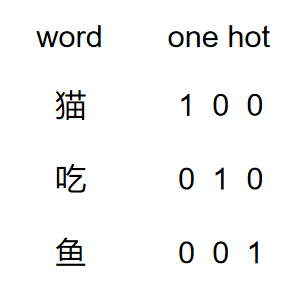

在独热编码中，每个离散特征都会被映射成一个二进制向量。在猫吃鱼这个例子中，第i个二进制位为1，表示该词是词表的第i个词。猫是第一个词，我们可以用[1, 0, 0]来表示它，吃是第二个词，就可以用[0, 1, 0]来表示，同理可以用[0, 0, 1]来表示第三个词鱼。

比如我们要创建一个索引为1的独热向量就可以用下面的代码实现。

In [16]:
import torch
from torch.nn import functional as F
F.one_hot(torch.tensor([0]), len(vocab))

tensor([[1, 0, 0,  ..., 0, 0, 0]])

**梗直哥提示：本节我们学习了文本数据的预处理方法，经过预处理后的文本，就变成了模型能够计算的数据。更加详细的知识点的掌握，有赖于你在实战中总结经验，慢慢就熟悉了。当然，如果你想大幅节省时间，解答自己在学习中的各种困惑，欢迎选修《梗直哥深度学习：python实战》。**